Maps which describe how the signal behave.

In [4]:
import mne
import glob
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [ ]:
import mne
import numpy as np

# Create a simple EEG signal with 5 channels and 100 samples
eeg_data = np.random.randn(5, 100)

# Define the sampling frequency
sfreq = 100  # in Hz

# Create the MNE info object
info = mne.create_info(ch_names=['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5'], sfreq=sfreq, ch_types='eeg')

# Create the MNE raw object
raw = mne.io.RawArray(eeg_data, info)

# Plot the raw EEG signal
raw.plot()


In [28]:
import mne
import glob
import matplotlib.pyplot as plt


raw_path = './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.fif'
raw = mne.io.read_raw(raw_path)
# raw.plot()

Opening raw data file ./eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.fif...
Isotrak not found
    Range : 0 ... 90999 =      0.000 ...   181.998 secs
Ready.


/var/folders/2q/tcysqlyn7v31hwmcd0v1qd100000gn/T/ipykernel_32180/1537704143.py:7: RuntimeWarning: This filename (./eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(raw_path)


In [108]:
import mne
import os
from mne.datasets import multimodal

fname_raw = os.path.join(multimodal.data_path(), 'multimodal_raw.fif')

In [109]:
raw = mne.io.read_raw_fif(fname_raw)

Opening raw data file /Users/riccardotedoldi/mne_data/MNE-multimodal-data/multimodal_raw.fif...
    Read a total of 7 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
    Range : 183600 ... 576599 =    305.687 ...   960.014 secs
Ready.


In [38]:
raw

<Raw | multimodal_raw.fif, 316 x 393000 (654.3 s), ~3.3 MB, data not loaded>

In [110]:
print(raw.acqparser)

<AcqParserFIF | categories: 20 (8 in use), events: 17 (8 in use)
Averaging categories:
1: "Visual Upper right"
2: "Visual Lower right"
3: "Visual Lower left"
4: "Visual Upper left"
5: "Somato right"
6: "Somato left"
7: "Auditory right"
8: "Auditory left">


In [ ]:
# apply bandpass filter
# raw.filter(1, 40)

# extract events + remove eye blinks
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, tmin=-1, tmax=1, baseline=None, preload=True)

# ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=42)
ica.fit(epochs)
ica.apply(epochs)

Not setting metadata
104 matching events found
Setting baseline interval to [-0.09989760657919393, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 7)
7 projection items activated


<Figure size 3840x2880 with 0 Axes>

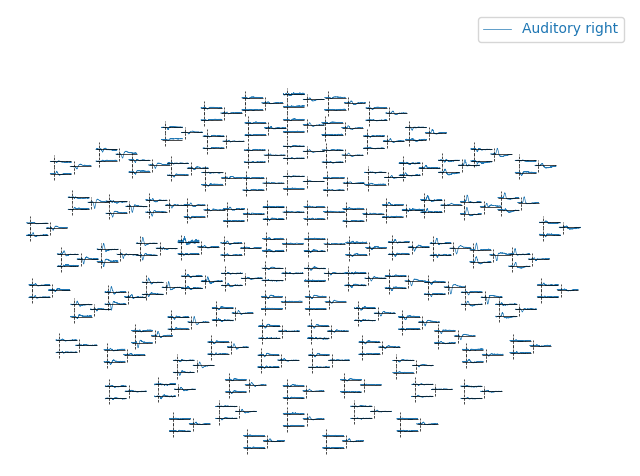

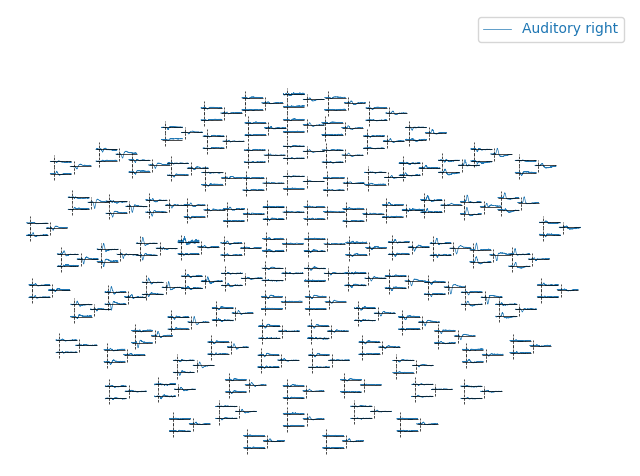

In [23]:
'''For example, in an auditory oddball task, participants may be presented 
with a series of auditory stimuli, and are instructed to press a button when 
they hear an infrequent "oddball" sound. The "standard" sounds and "oddball" 
sounds constitute two different experimental conditions.

raw.acqparser.get_condition() is a function that can be used to retrieve 
the EEG data specifically associated with a particular experimental condition. 
The function takes as input the raw EEG data, and a label specifying the 
condition of interest (e.g., "Auditory right" for EEG data recorded during 
presentation of sounds to the right ear). It returns the EEG data that is 
associated with the specified condition label.

'''

cond = raw.acqparser.get_condition(raw, 'Auditory right')
epochs = mne.Epochs(raw, **cond)
import matplotlib.pyplot as plt
epochs.average().plot_topo(background_color='w')

In [113]:
len(raw.acqparser.get_condition(raw, 'Auditory right')['events'][:,0])

104

In [90]:
import torch


a = torch.Tensor(raw.get_data()[0][:100]).reshape(100, 1)
b = torch.Tensor(raw.get_data()[1][:100]).reshape(1, 100)

res = a @ b

<Axes: >

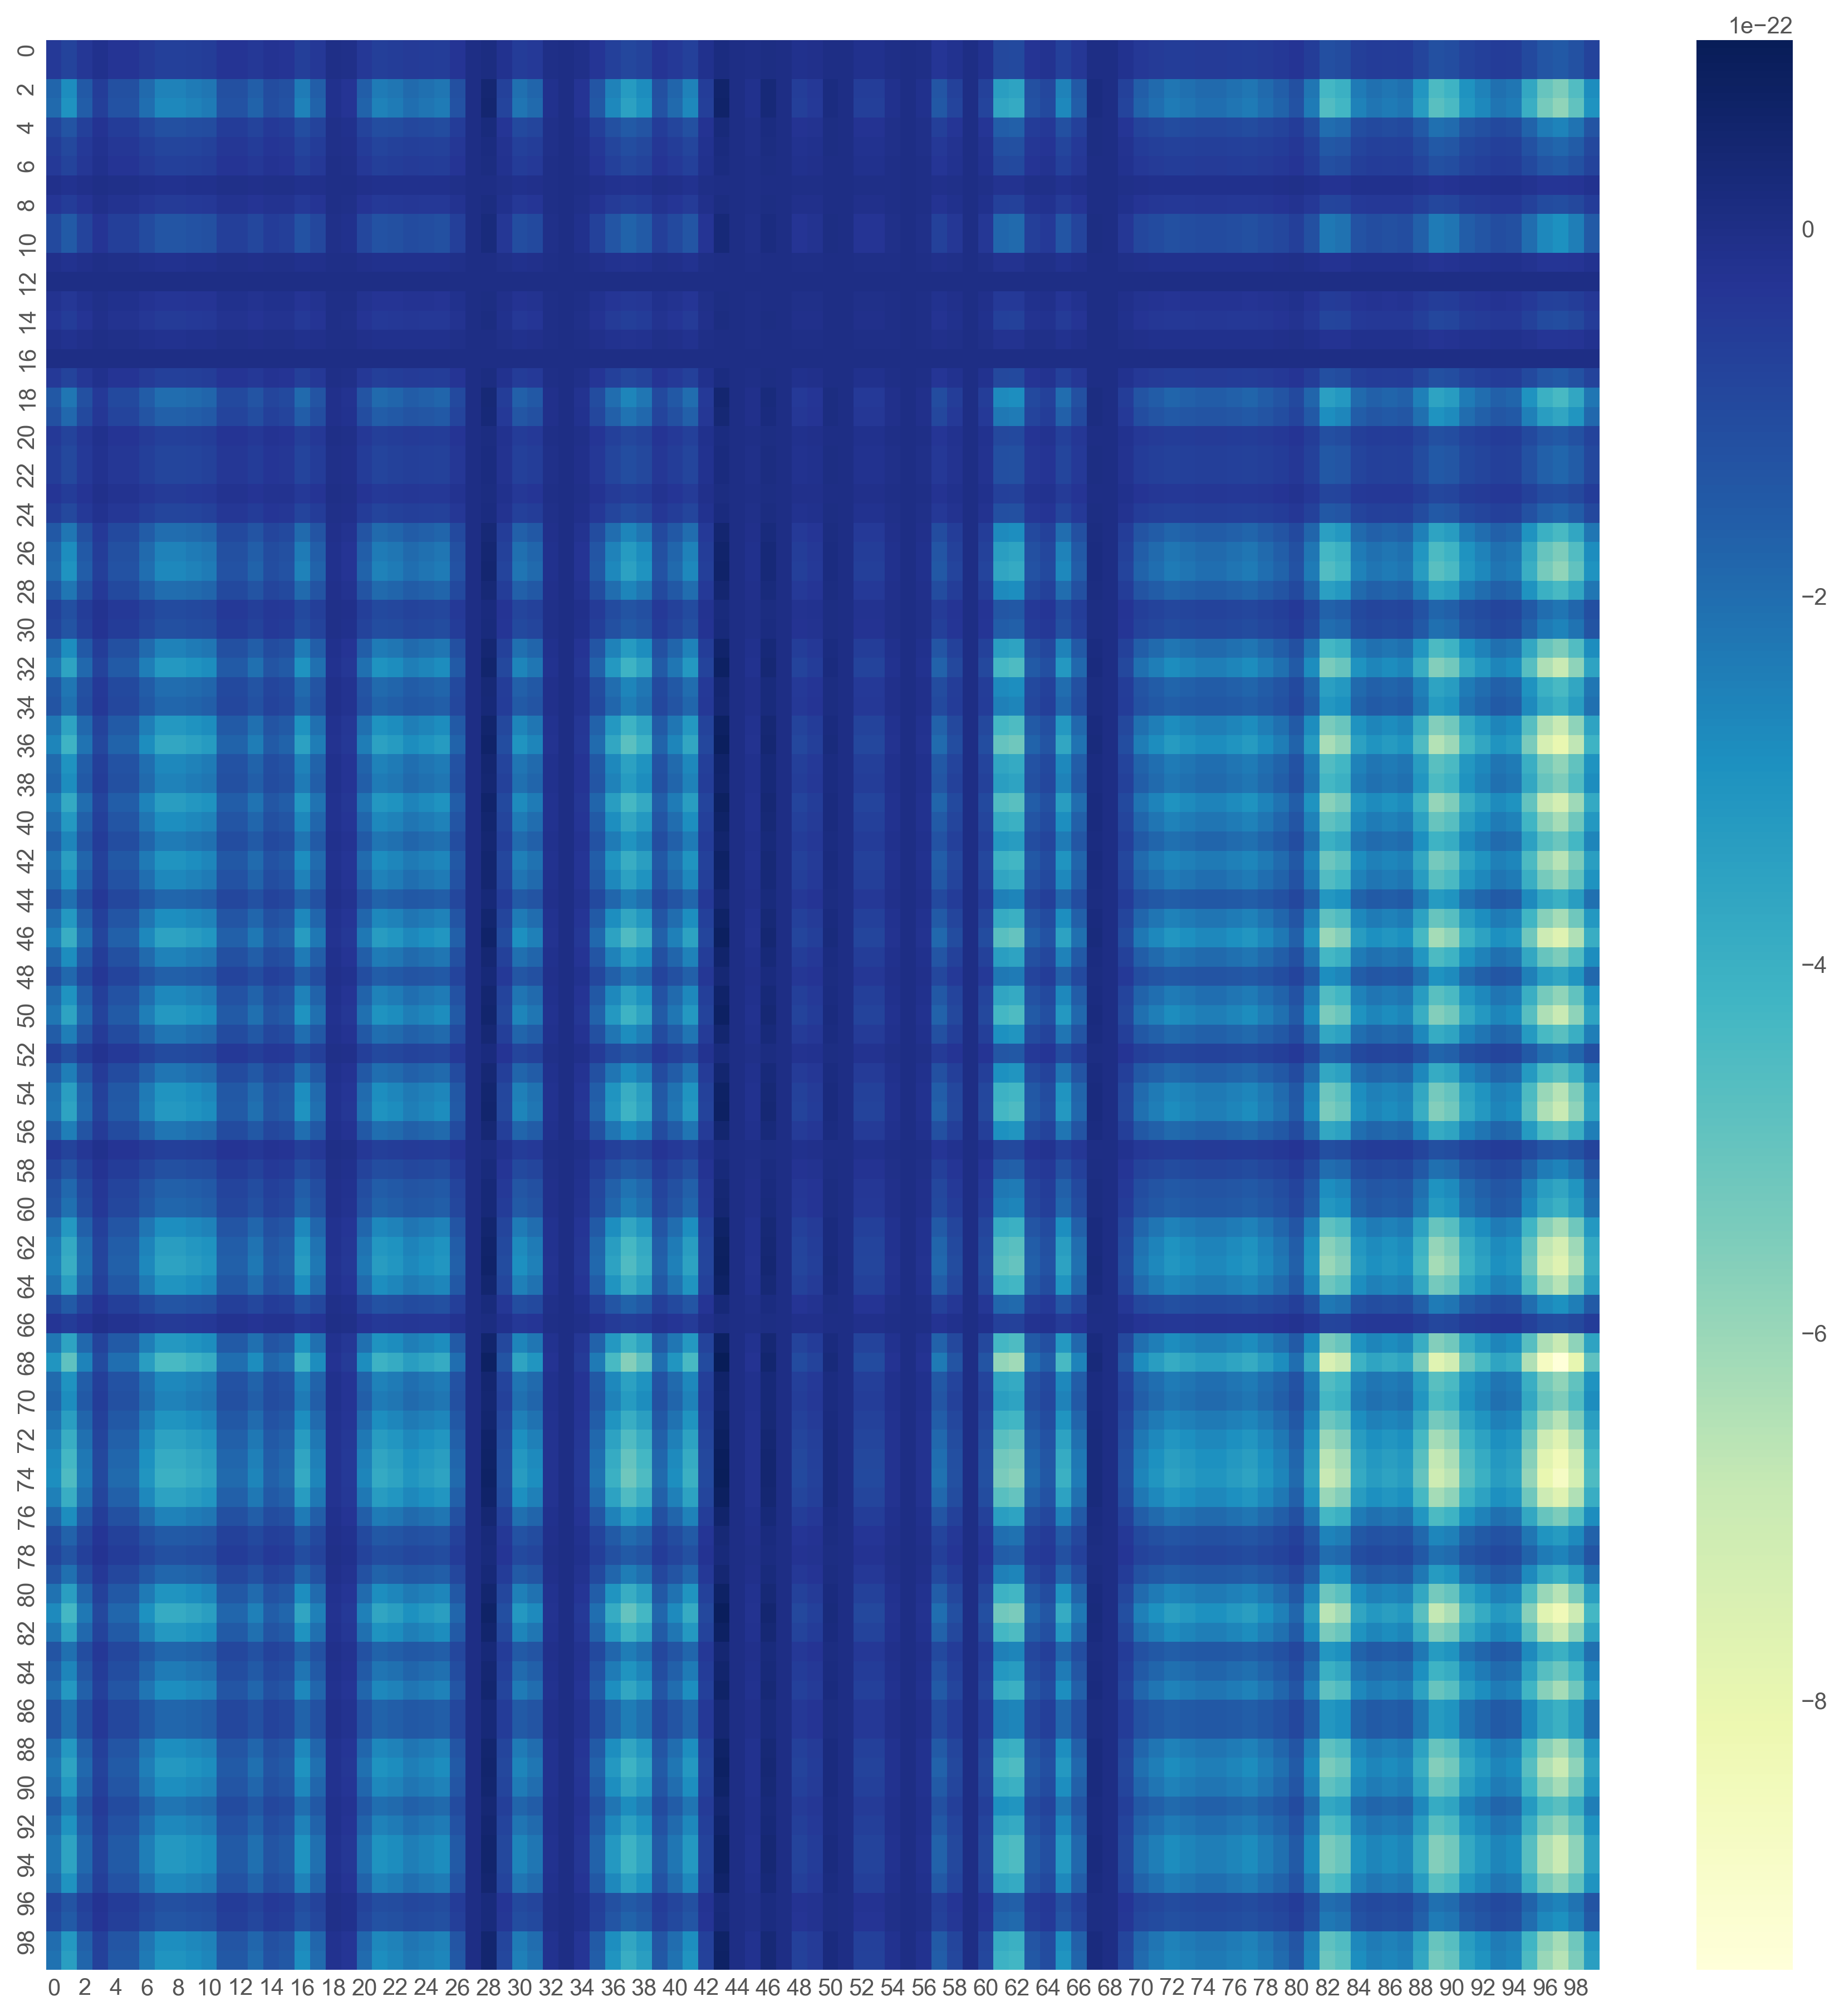

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(15, 15), dpi=300)
sns.heatmap(res, cmap="YlGnBu")

In [86]:
from mne import create_info

# Create info object for discrete signal
ch_names = raw.info['ch_names']
ch_types = ['eeg'] * len(ch_names)
sfreq = raw.info['sfreq']
info = create_info(ch_names, sfreq, ch_types)

In [95]:
"""In the context of EEG signal processing, lowpass and highpass filters are used to 
remove unwanted frequency components from the signal.

Good channels refer to the EEG channels that have good signal quality and are free 
of artifacts such as noise or electrode drift.

Sampling frequency refers to the number of samples of a signal that are taken per second 
during the analog-to-digital conversion process. It is measured in Hertz (Hz) and 
determines the resolution of a digital signal. The higher the sampling frequency, the more
accurate the digital representation of the original signal will be. 

A lowpass filter allows frequencies below a certain cutoff frequency to pass through 
while attenuating frequencies above that frequency. This is useful to remove high 
frequency noise from the signal and to smooth the signal. For example, a lowpass filter 
with a cutoff frequency of 30 Hz would allow frequencies below 30 Hz to pass through 
while attenuating frequencies above 30 Hz.

A highpass filter allows frequencies above a certain cutoff frequency to pass through
while attenuating frequencies below that frequency. This is useful to remove low 
frequency noise or baseline drift from the signal.

"""

info


<Info | 7 non-empty values
 bads: []
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 316 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 300.3 Hz
 meas_date: unspecified
 nchan: 316
 projs: []
 sfreq: 600.6 Hz
>

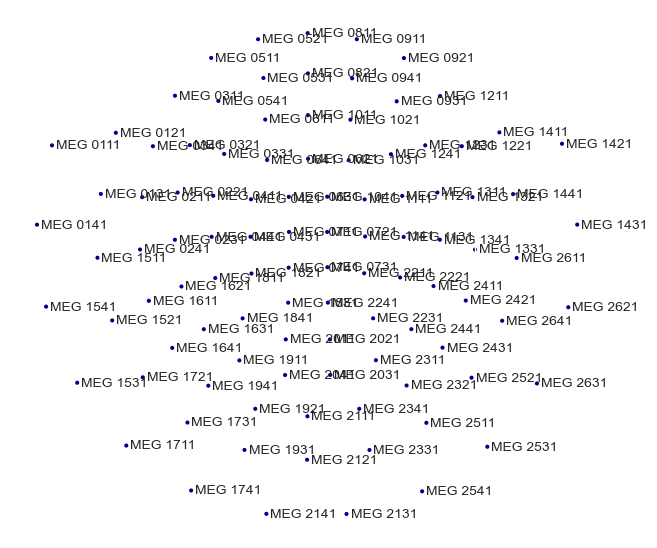

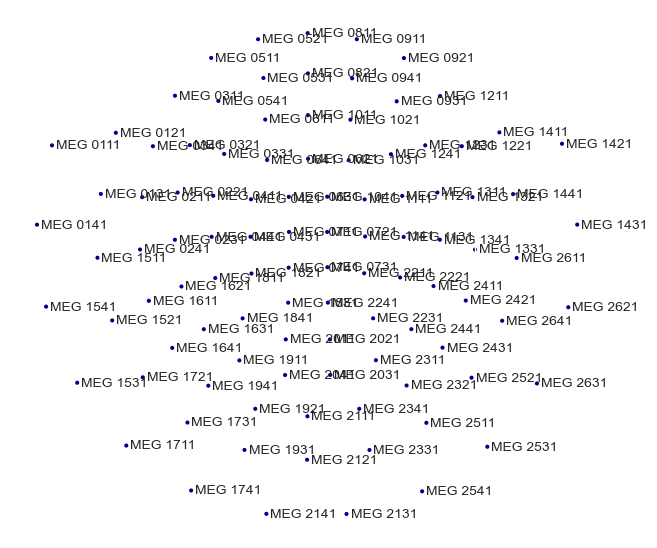

In [121]:
""" What is the spectral density of an EEG signal?
The spectral density is a mathematical representation of how a signal's power is distributed 
across different frequencies. It describes the strength of a signal at each frequency, indicating 
which frequencies are dominant in the signal and which are not. Spectral density is often 
used in signal processing and analysis to better understand the characteristics of a signal and
to identify patterns or features that may be useful in different applications. In the context of EEG
signals, spectral density is used to analyze the frequency content of brain signals and to identify 
different frequency bands that are associated with different cognitive processes.

"""
raw.plot_sensors(kind='topomap',show_names=True)

Here we are computing the attention maps. Whenever the signal percived from the brain behave in the same way there is a perfect correleation with the two signals. Specifically, from those maps we can detect patterns that might be useful to understand which come next.

In [98]:
"""Compute the attention map for each channel in the raw data
first channel with the rest of the channels.

"""

attn_map = []

for i in range(raw.get_data().shape[0]):
    a = torch.Tensor(raw.get_data()[0][:100]).reshape(100, 1)
    b = torch.Tensor(raw.get_data()[i][:100]).reshape(1, 100)
    attn_map.append(a @ b)
    
    

In [99]:
import pickle
# save the attention maps into a pickle file
with open("attn_maps.pickle", 'wb') as pfile:
    pickle.dump(attn_map, pfile, protocol=pickle.HIGHEST_PROTOCOL)

<Axes: >

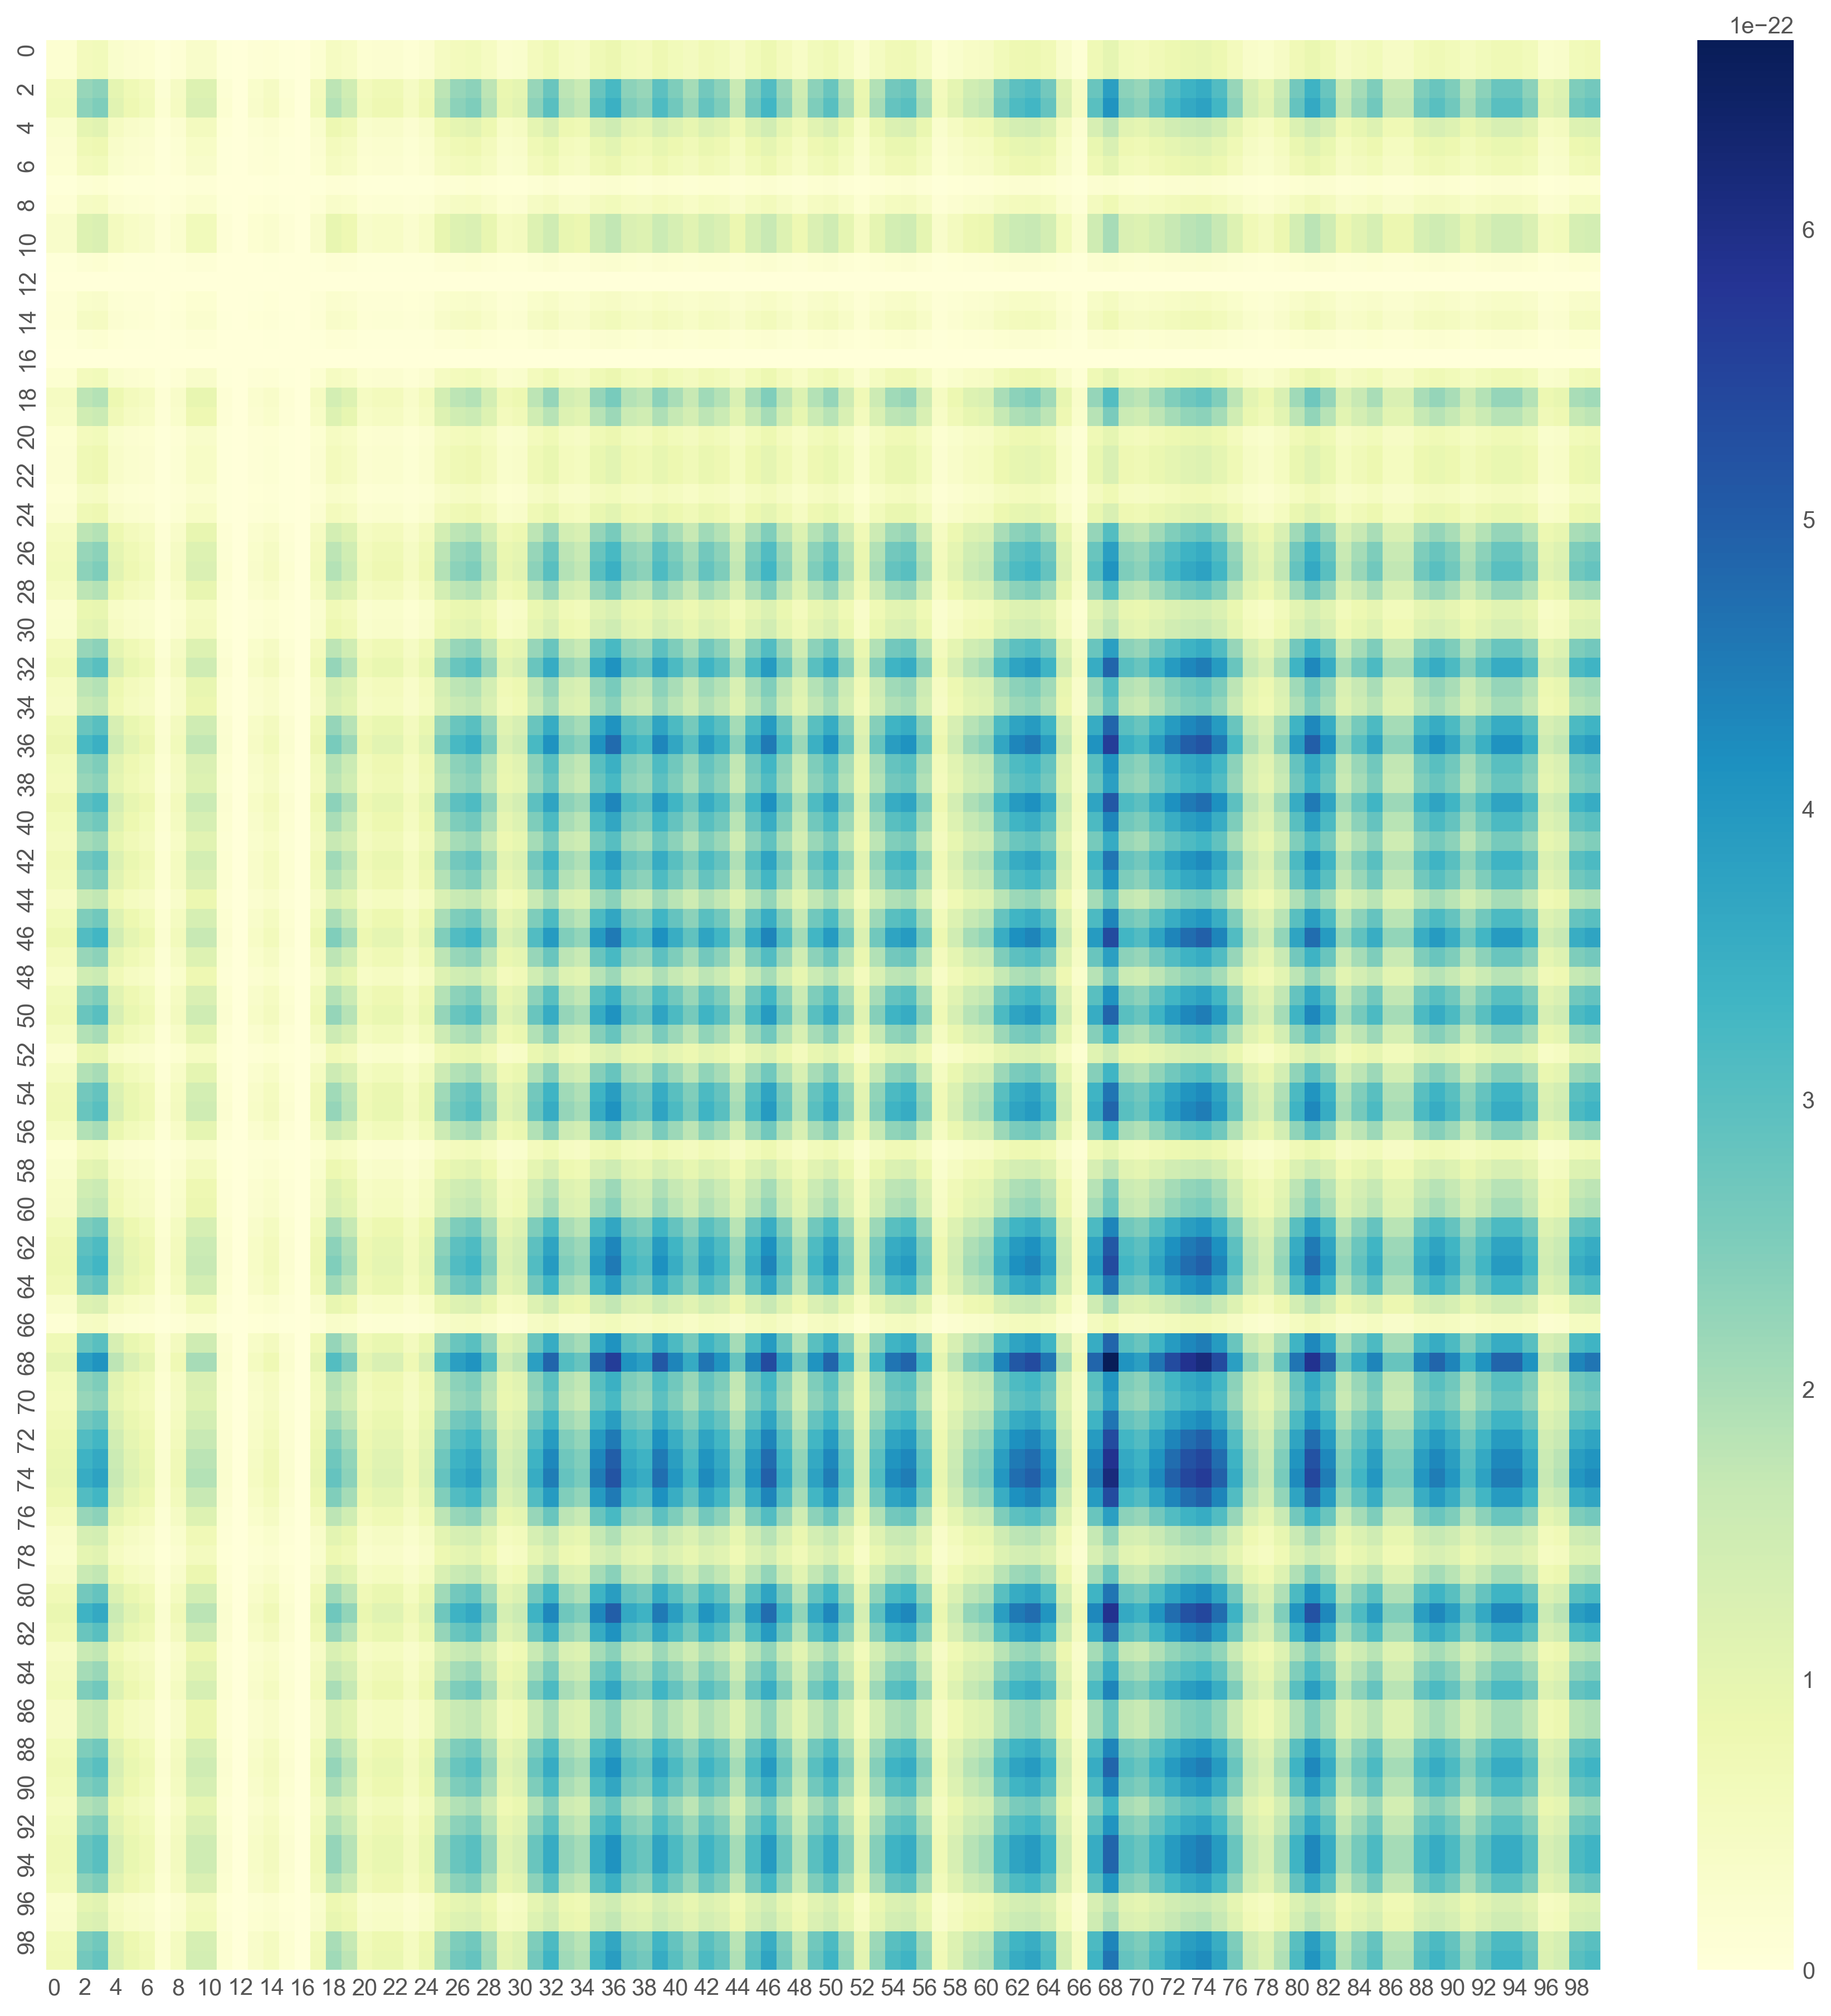

In [100]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15), dpi=300)
sns.heatmap(attn_map[0], cmap="YlGnBu")

# whenever the channel behave in the same way

<Axes: >

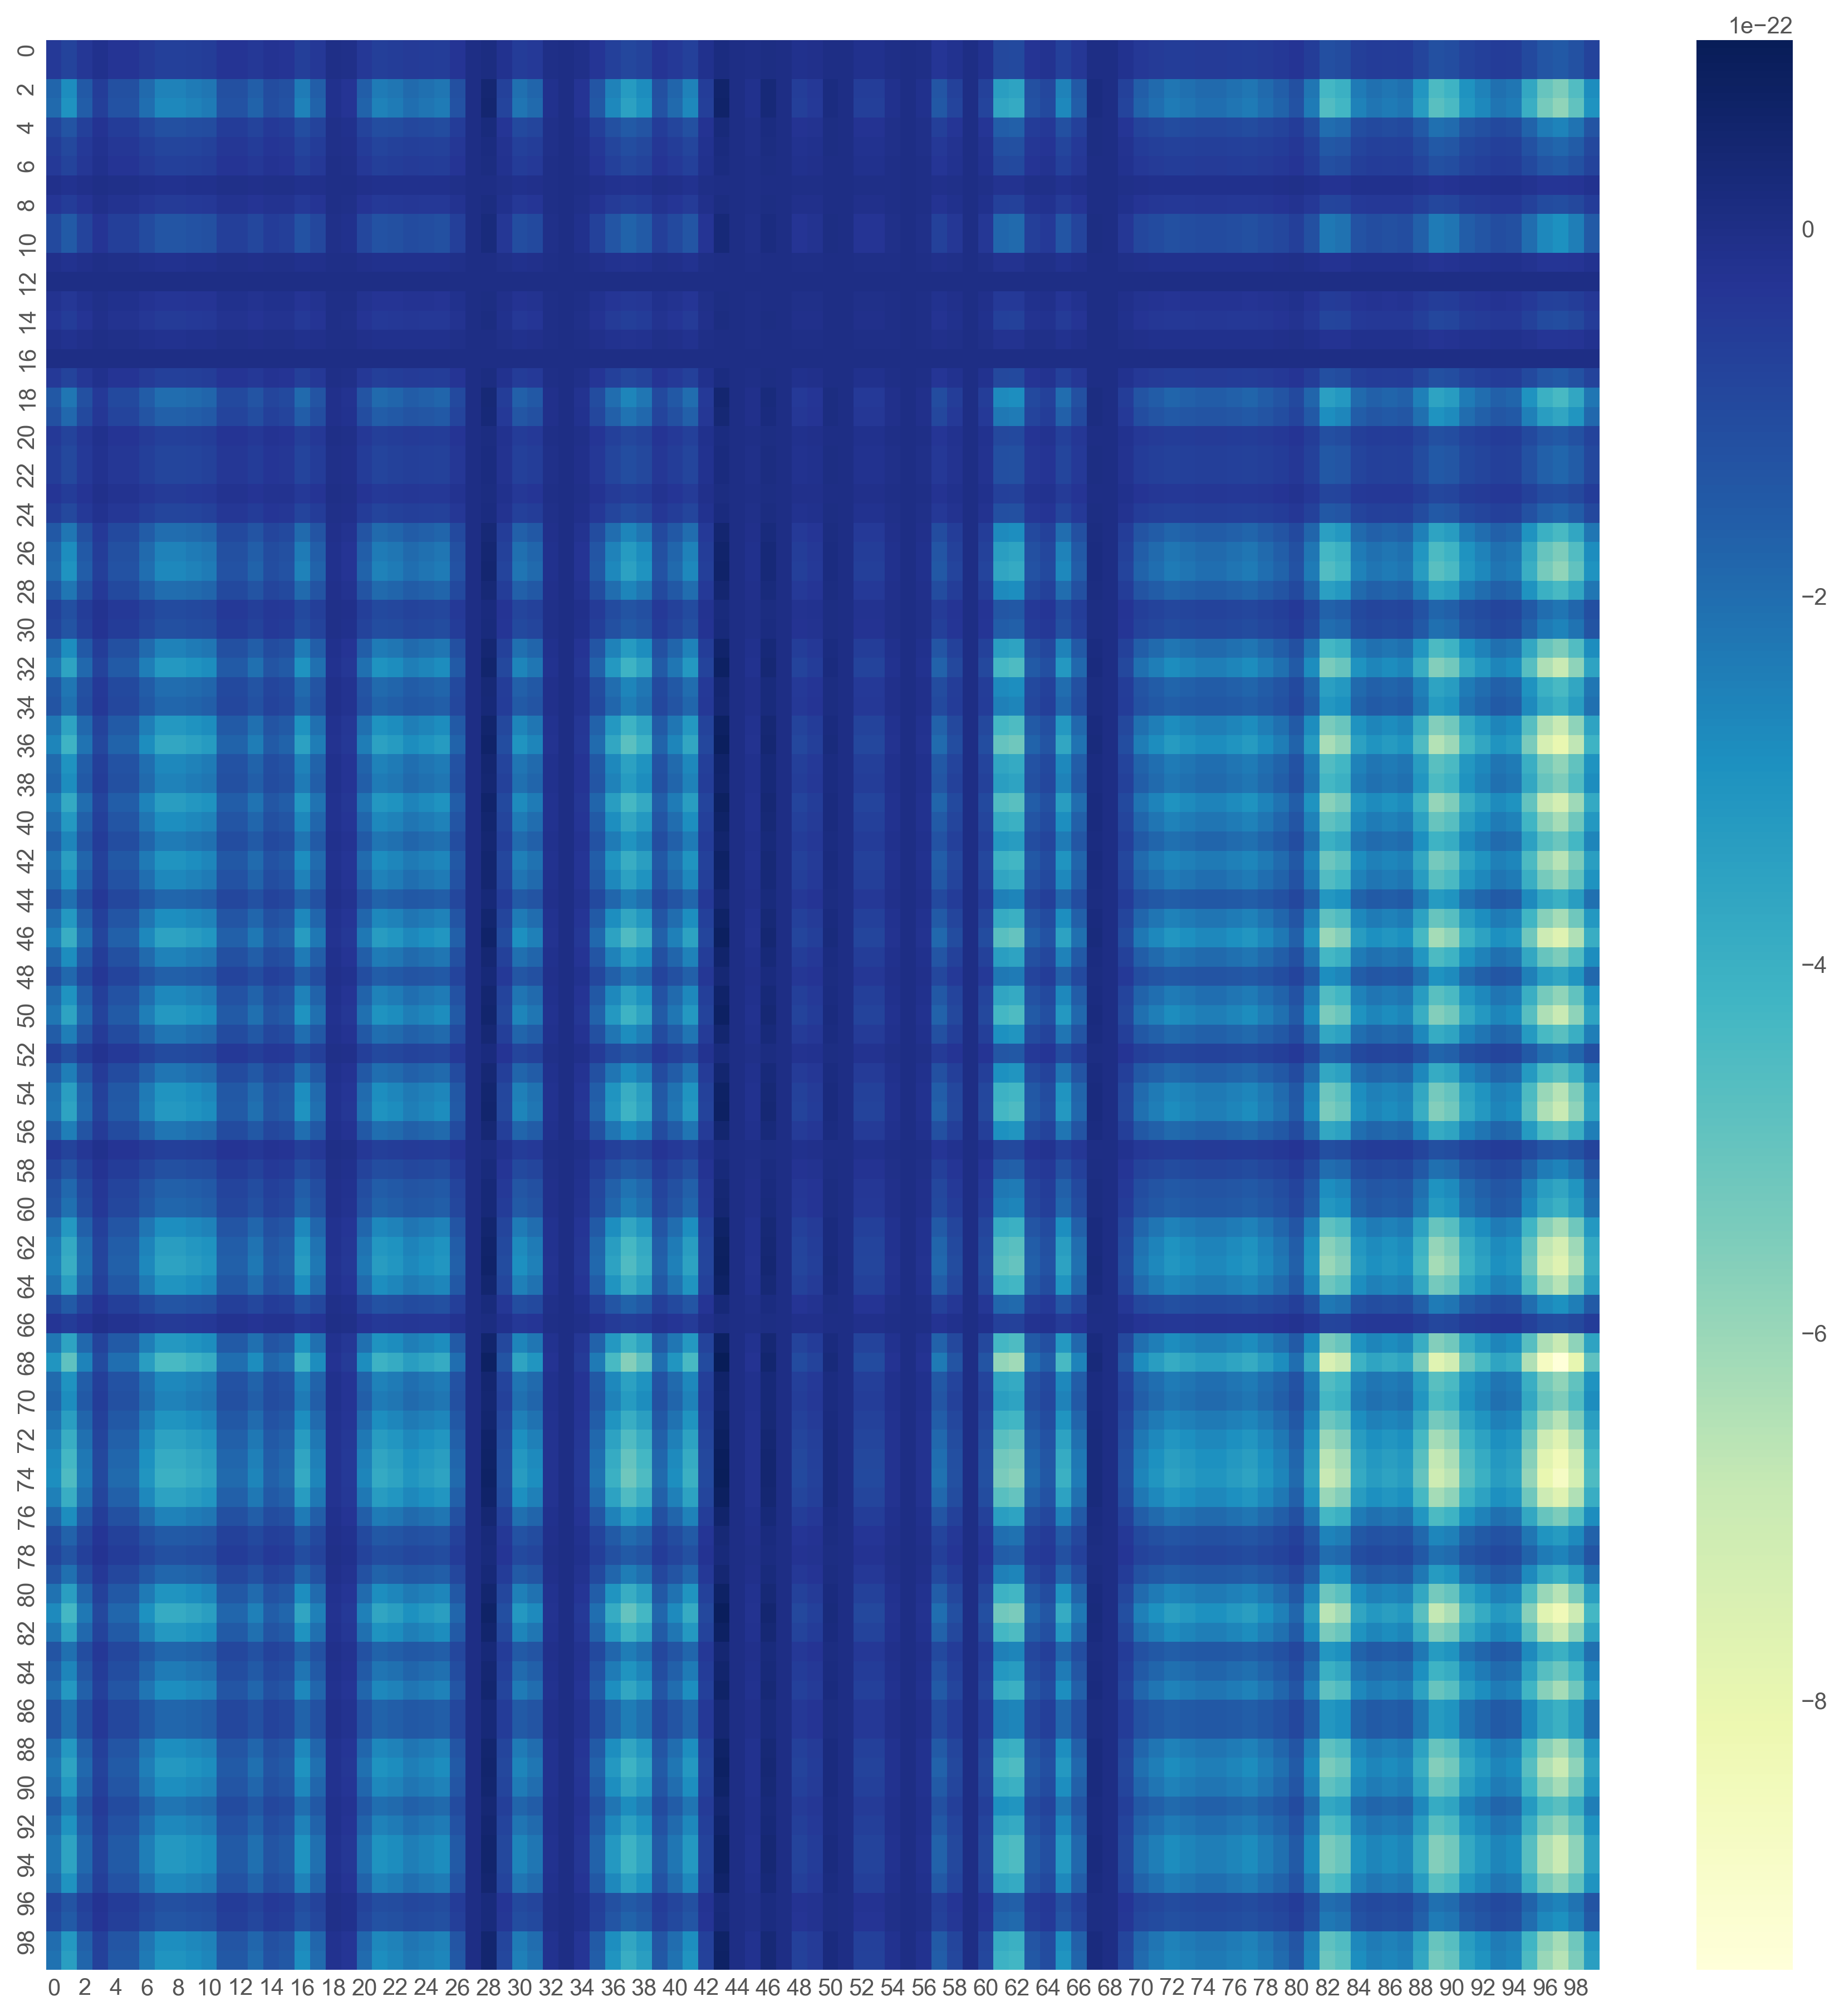

In [101]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15), dpi=300)
sns.heatmap(attn_map[1], cmap="YlGnBu")

# whenever the channels does not behave in the same way

<Axes: >

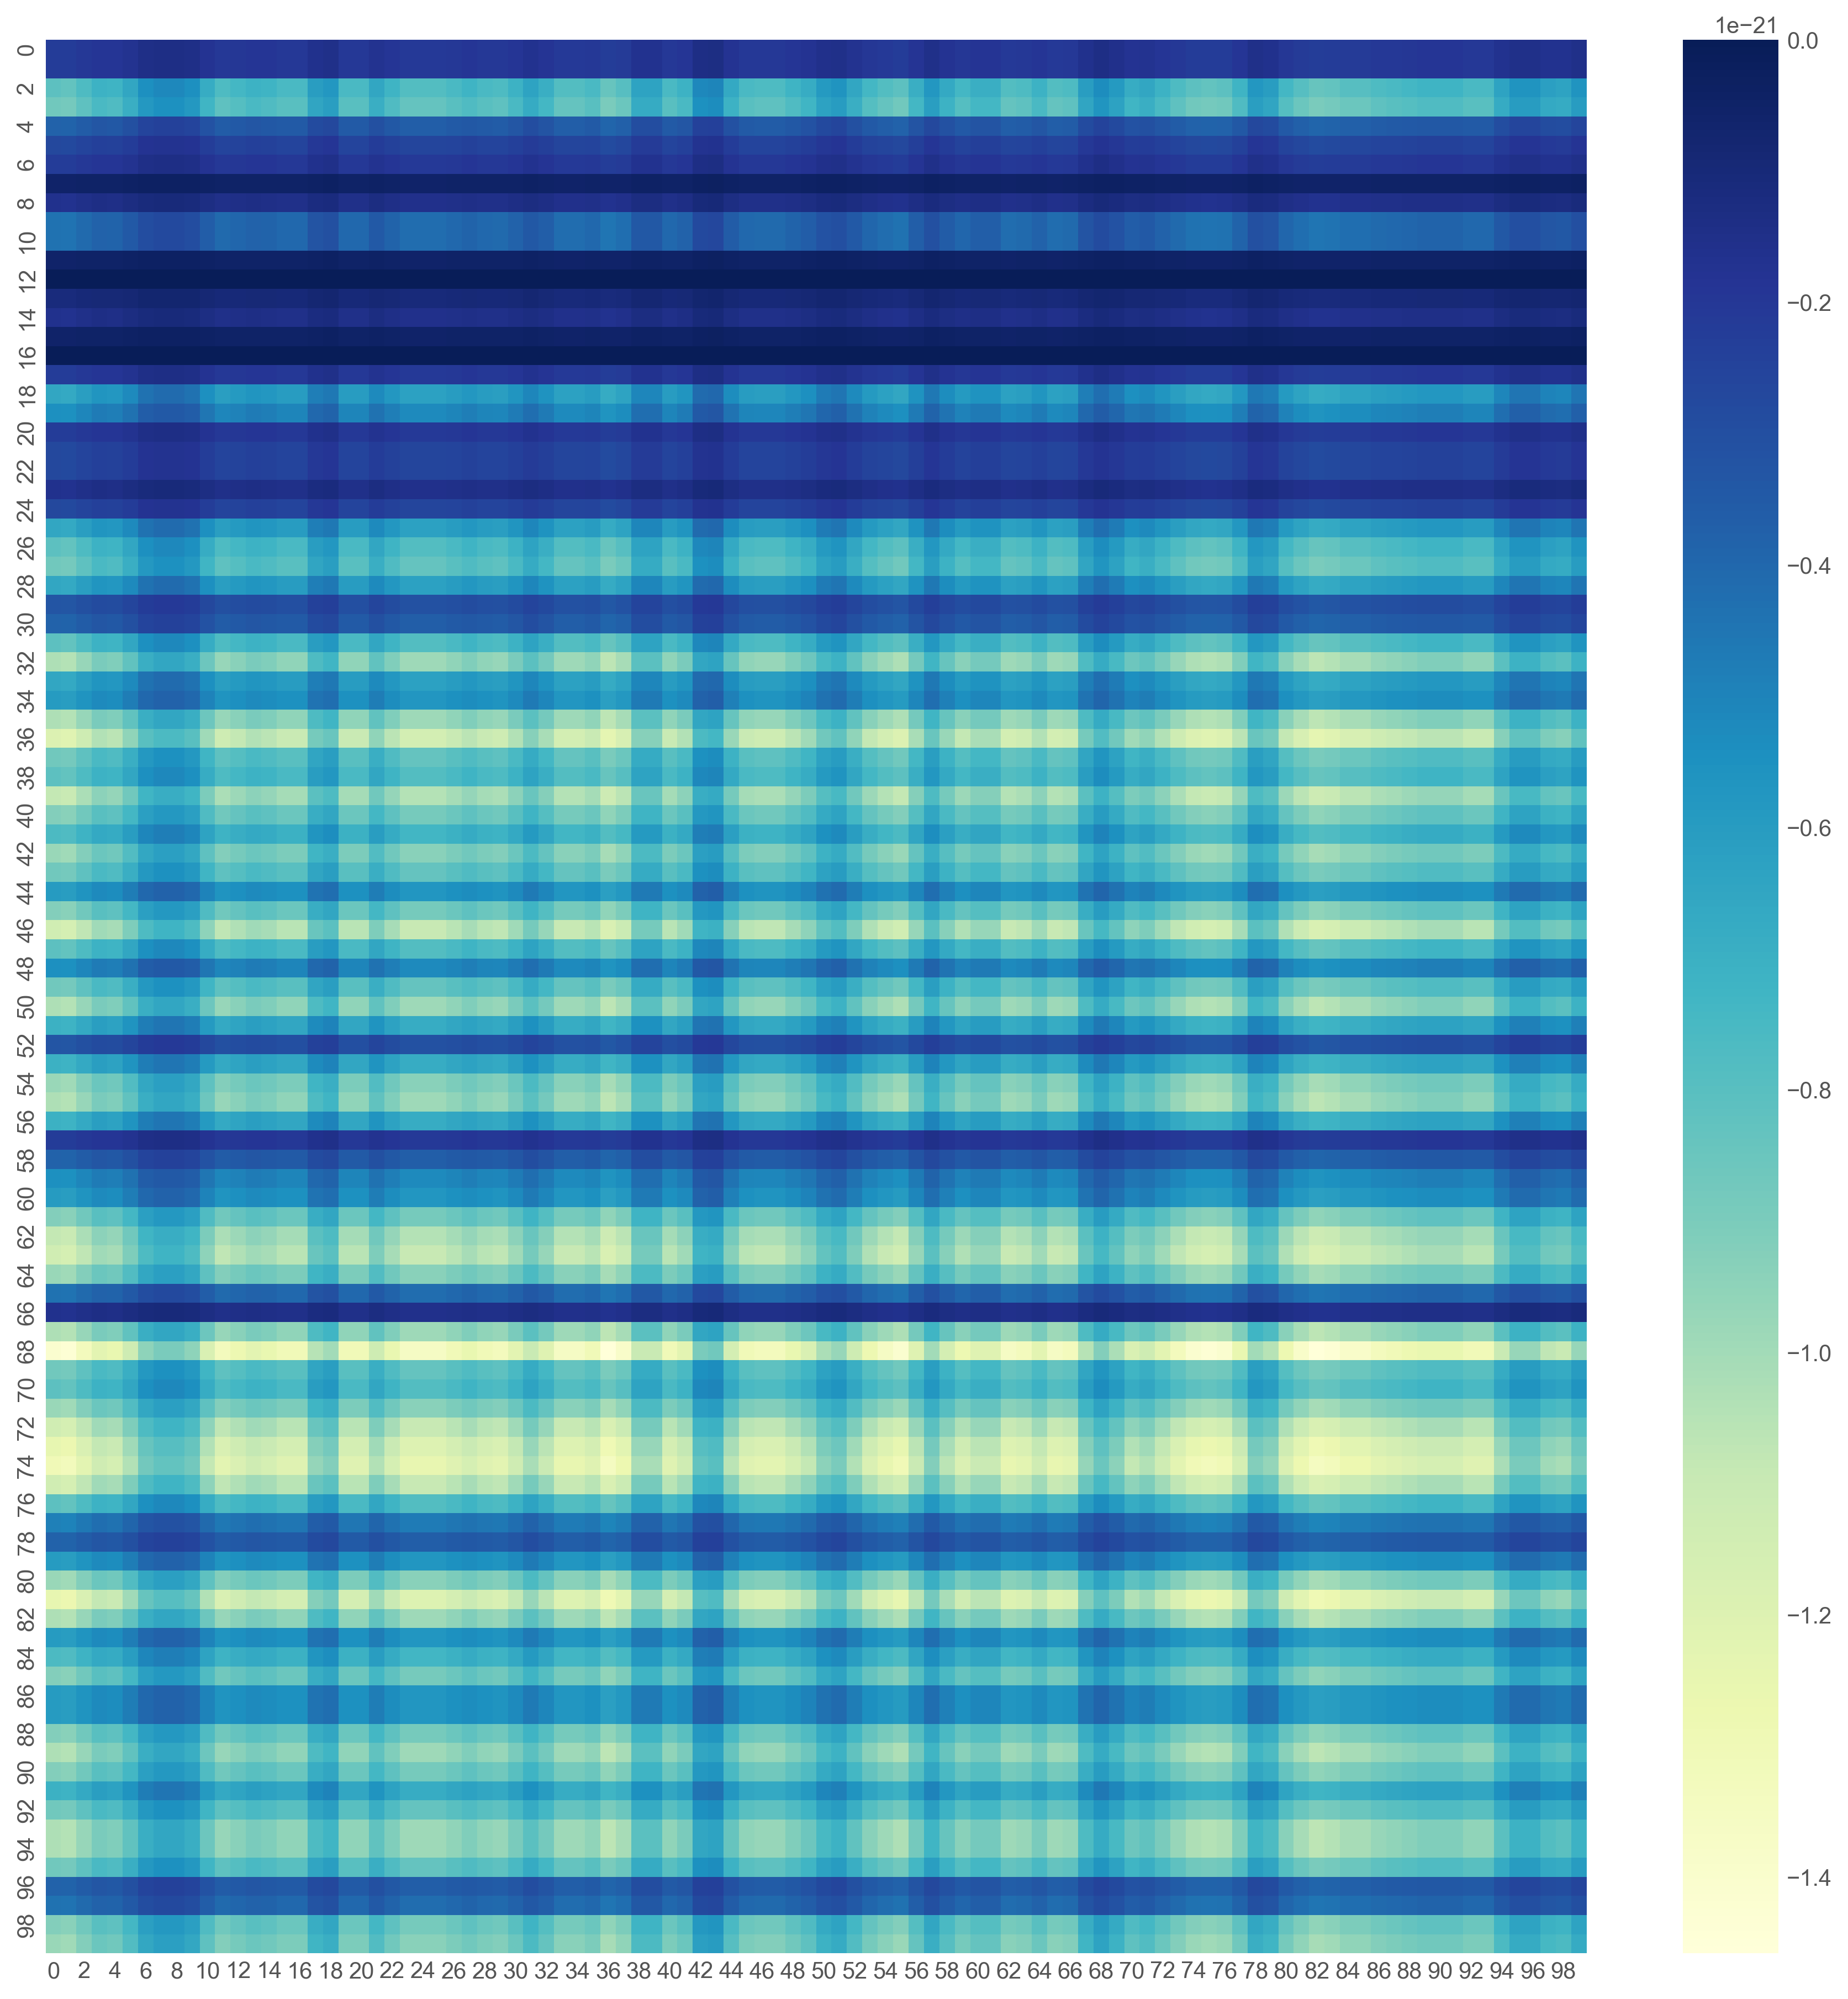

In [102]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15), dpi=300)
sns.heatmap(attn_map[300], cmap="YlGnBu")

<Axes: >

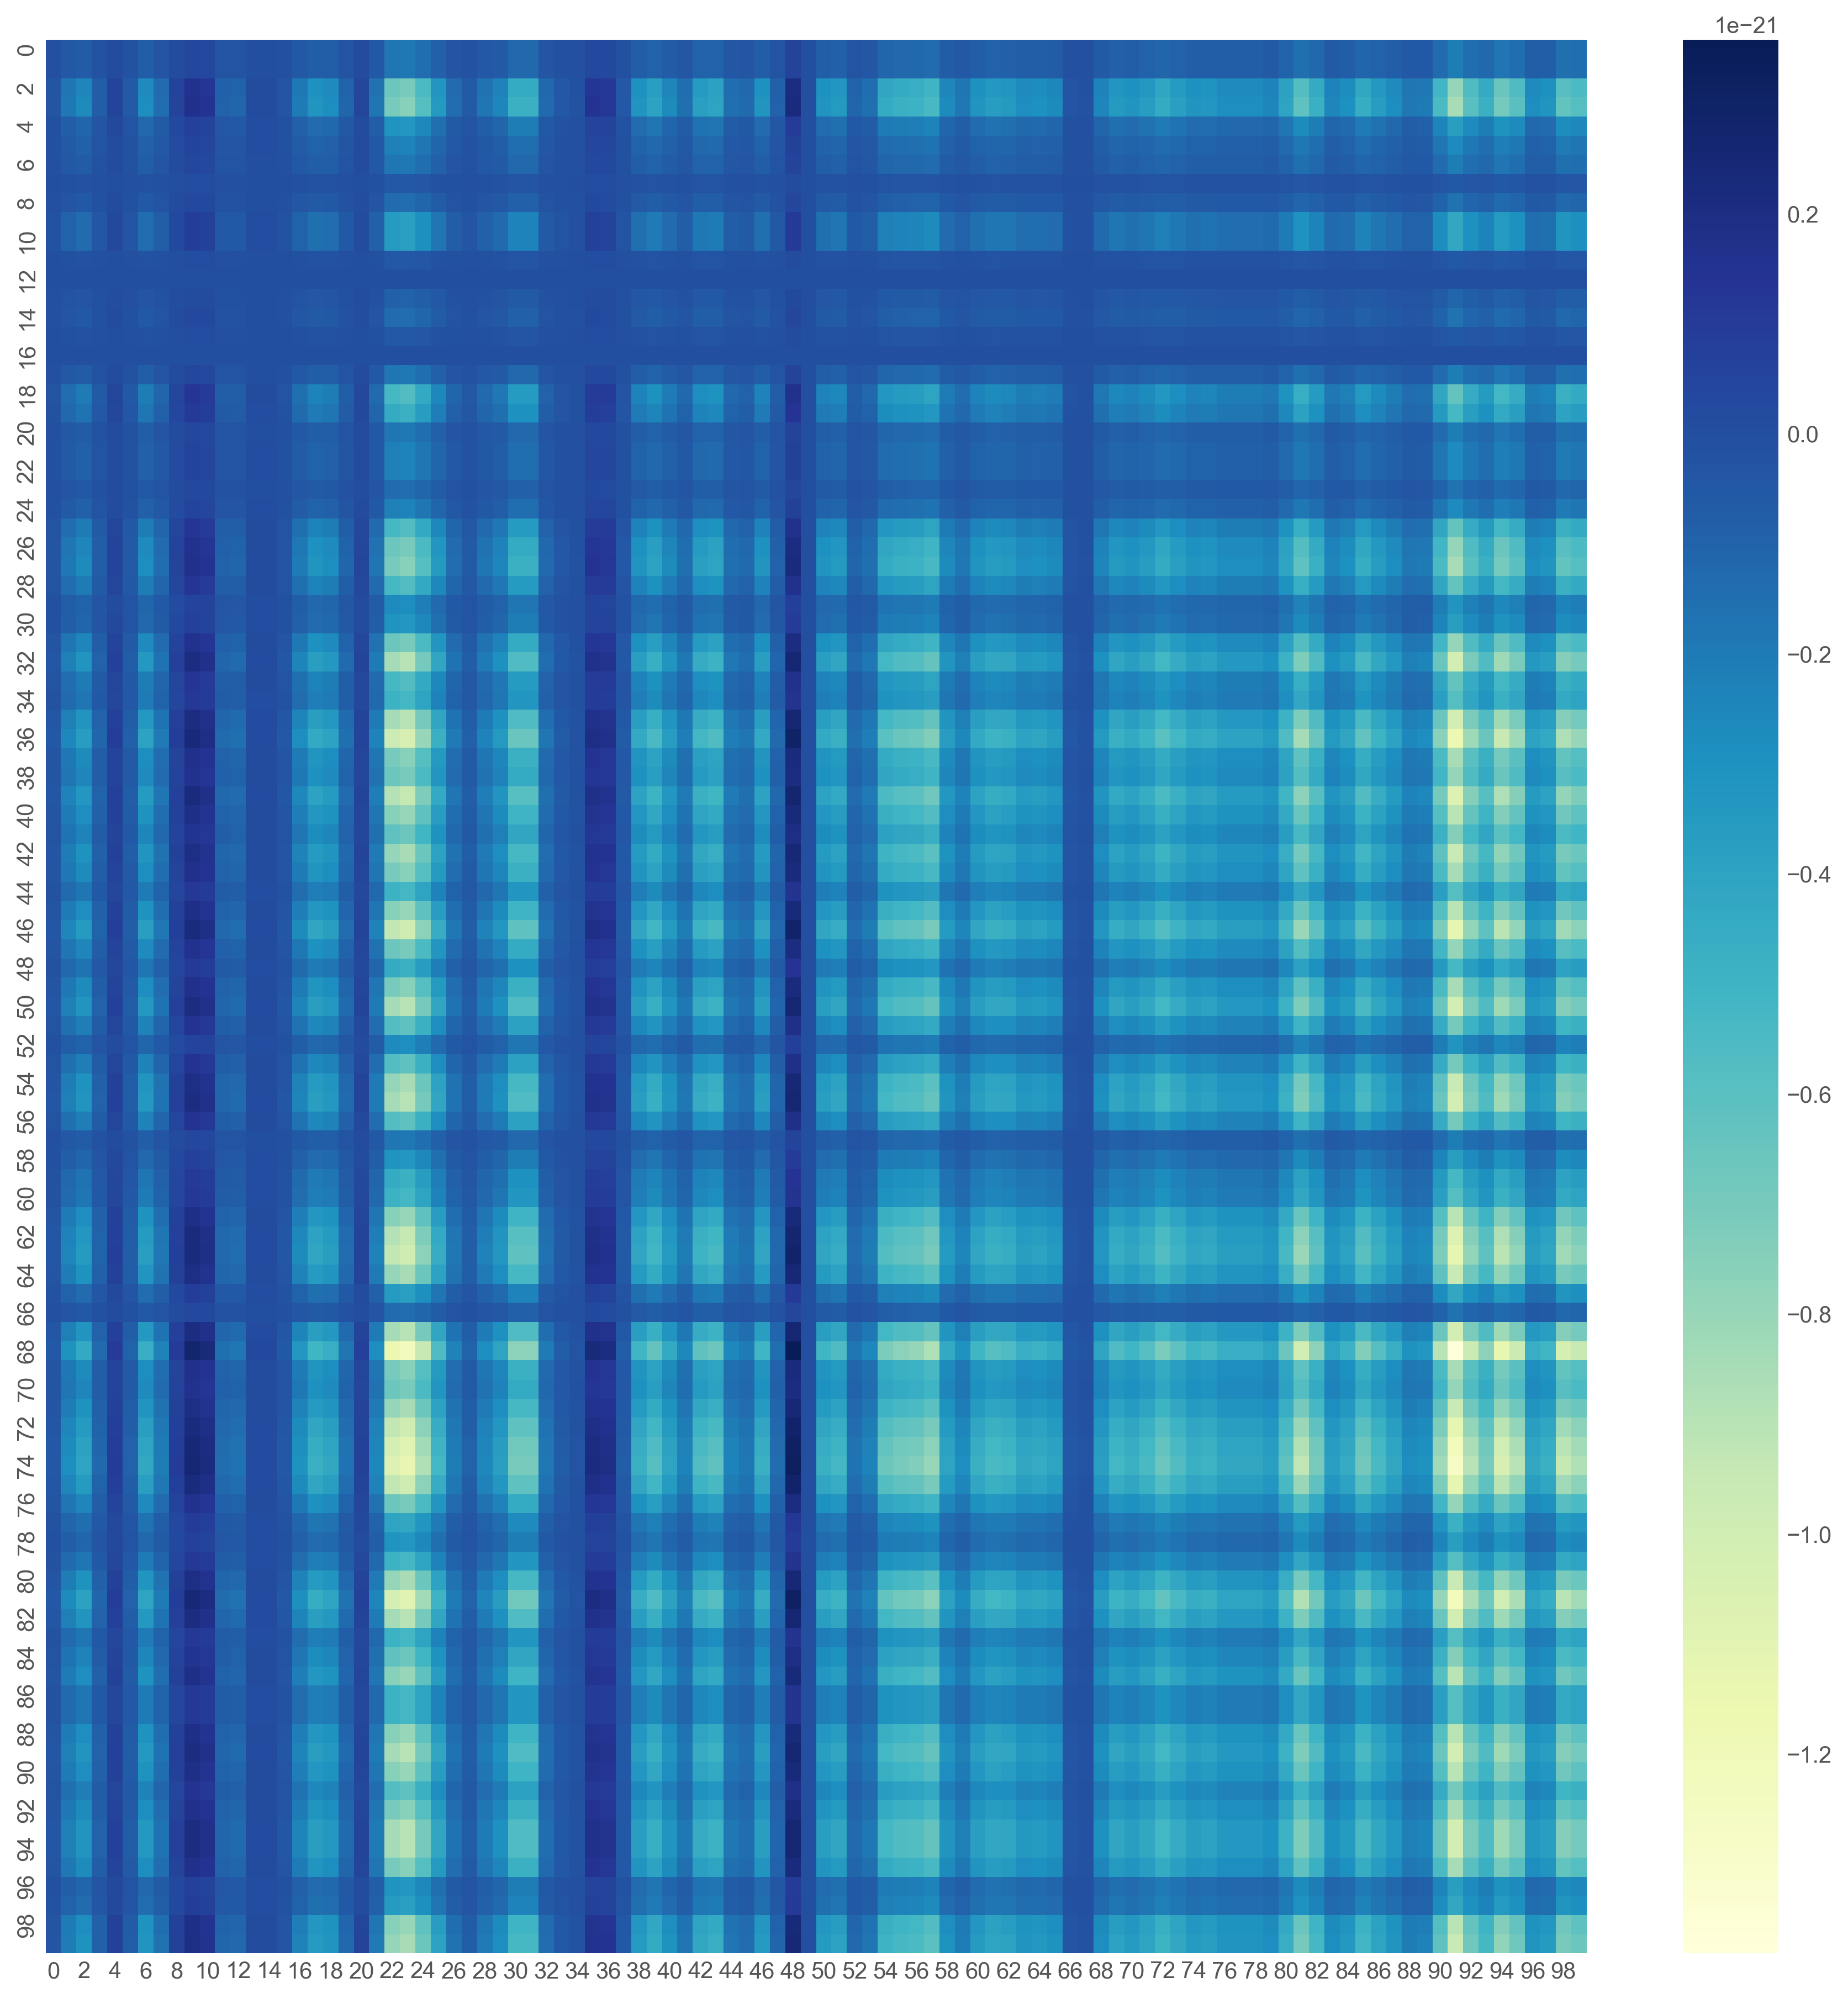

In [166]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15), dpi=300)
sns.heatmap(attn_map[124], cmap="YlGnBu")

In [162]:

attn_maps = torch.zeros((1, len(attn_map), len(attn_map[0])*len(attn_map[0])))

for i in range(len(attn_map)):
    attn_maps[0][i] = attn_map[i].flatten()
    
    
attn_maps.shape

torch.Size([1, 316, 10000])

In [32]:
import pickle
# save the attention maps into a pickle file
with open("attn_maps.pickle", 'rb') as pfile:
    attn_map = pickle.load(pfile)

<Axes: >

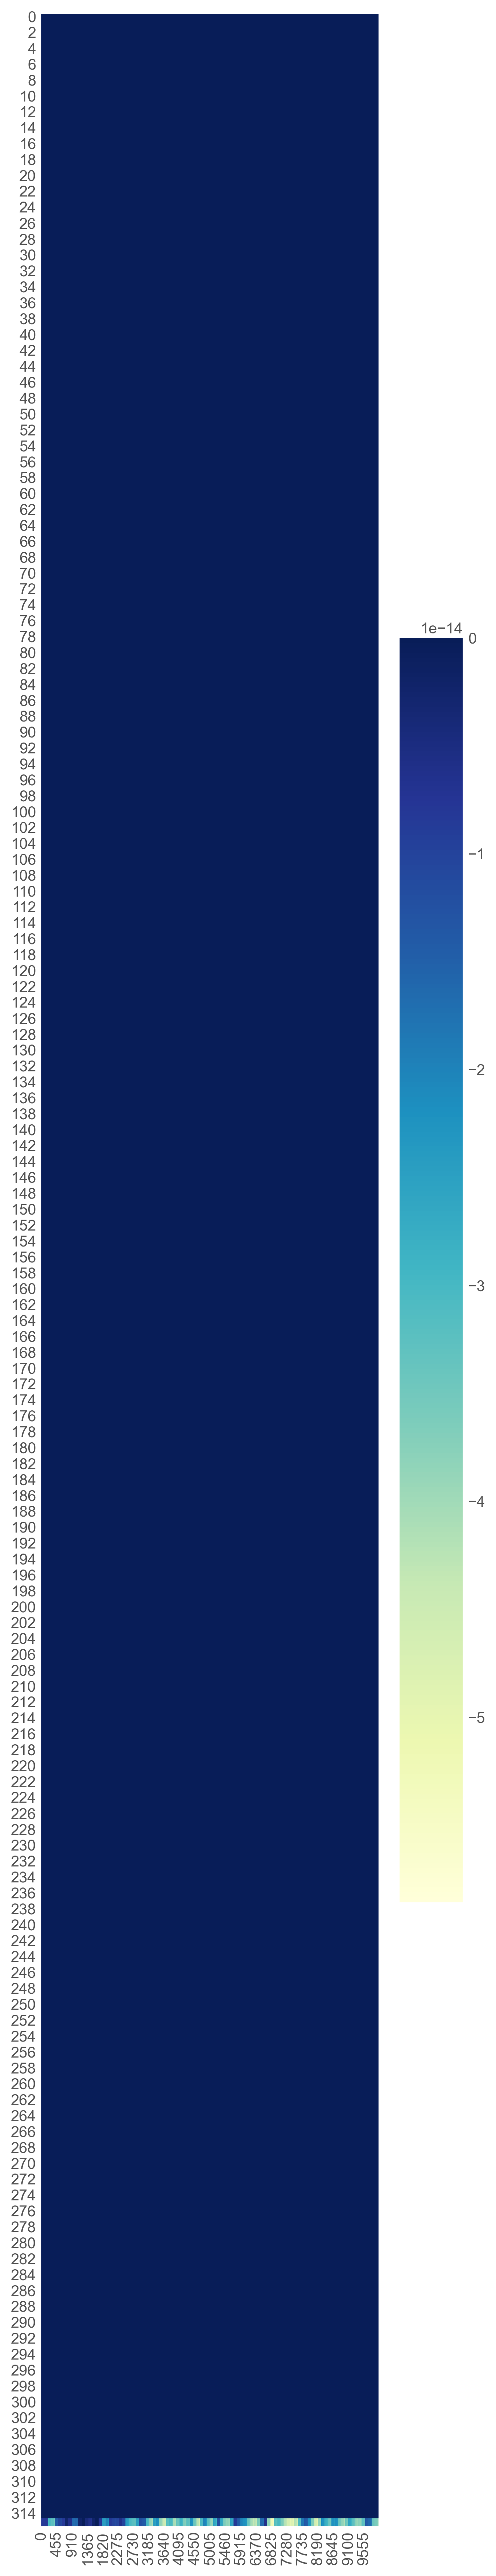

In [163]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 30), dpi=300)
sns.heatmap(attn_maps[0], cmap="YlGnBu")

In [33]:
# store the attebtion maps in a tensor
n=100
n_elem_mat = int(((n**2-n)/2)+n)
idx = torch.triu_indices(*attn_map[0].shape)


attn_maps = torch.zeros((1, len(attn_map), n_elem_mat))

for i in range(len(attn_map)):
    attn_maps[0][i] = attn_map[i][idx[0], idx[1]]
    
    
attn_maps.shape


torch.Size([1, 316, 5050])

In [26]:
m = []
for i in range(len(attn_map)):
    m.append(torch.mean(attn_map[i]))
    
torch.Tensor(m)


tensor([ 1.5543e-22, -1.3911e-22, -3.3116e-22, -3.6873e-22, -1.6186e-22,
        -3.1253e-22, -4.0645e-22, -1.7361e-22, -3.3114e-22,  6.8627e-23,
        -8.0992e-23, -3.4836e-22,  1.3478e-22, -1.1079e-22, -3.5480e-22,
        -3.0814e-22, -2.8700e-22, -4.4508e-22, -3.6094e-22, -3.8295e-22,
        -4.5302e-22, -3.8827e-23, -1.9042e-22, -3.6493e-22,  1.8053e-23,
         3.3139e-23, -3.0044e-22, -3.5599e-22, -2.1132e-22, -4.1678e-22,
         2.9763e-22, -1.9599e-22, -4.7032e-22,  2.1145e-23,  1.5827e-23,
        -3.3644e-22,  3.9680e-22, -3.2607e-22, -5.0784e-22, -4.7569e-22,
        -4.9832e-22, -4.9541e-22, -3.7998e-22, -4.8027e-22, -5.1539e-22,
         4.5257e-22, -3.2533e-22, -5.2197e-22, -2.3865e-22, -3.1037e-23,
        -2.1831e-22, -2.0526e-22,  2.1021e-23, -1.1367e-22, -3.3955e-22,
         2.2257e-23, -2.1106e-22, -4.2054e-22, -1.4789e-22, -3.5228e-22,
         8.5073e-23, -2.1231e-22, -3.4893e-22, -3.3176e-22, -1.7583e-22,
        -3.3017e-22,  2.5200e-22, -2.2789e-22, -4.1